In [2]:
webpage = requests.get("https://www.koreabaseball.com/Record/Retire/Pitcher.aspx?playerId=83540")
soup = BeautifulSoup(webpage.content, "html.parser")

In [3]:
print(soup)


<!DOCTYPE html>

<html lang="ko">
<head><title>
	은퇴선수(투수) | 기록실 | KBO
</title><meta content="text/html; charset=utf-8" http-equiv="Content-Type"/><meta content="text/javascript" http-equiv="Content-Script-Type"/><meta content="text/css" http-equiv="Content-Style-Type"/><meta content="IE=edge, Chrome" http-equiv="X-UA-Compatible"/><meta content="KBO" name="title"/><meta content="스포츠투아이" name="author"/><meta content="KBO, 한국야구위원회, 프로야구, KBO 리그, 퓨처스리그, 프로야구순위, 프로야구 일정" name="keywords"/><meta content="width=1200" name="viewport"/>
<!-- OG -->
<meta content="website" property="og:type"/><meta content="KBO 홈페이지" property="og:title"/><meta content="KBO, 한국야구위원회, 프로야구, KBO 리그, 퓨처스리그, 프로야구순위, 프로야구 일정" property="og:description"/><meta content="https://lgcxydabfbch3774324.cdn.ntruss.com/KBO_IMAGE/KBOHome/resources/images/common/open_graph_kbo_2022.png" property="og:image"/><meta content="https://www.koreabaseball.com/" property="og:url"/>
<link href="//lgcxydabfbch3774324.cdn.ntruss.com/KBO_IMAG

In [4]:
soup.find_all("tbody")[0].get_text()

'\n\n1983\n롯데  \n2.89\n38\n16\n1\n9\n16\n4\n0\n0.360\n863\n208 2/3\n202\n17\n51\n8\n148\n89\n67\n\n\n1984\n롯데  \n2.40\n51\n14\n1\n27\n13\n6\n0\n0.675\n1132\n284 2/3\n228\n18\n68\n14\n223\n91\n76\n\n\n1985\n롯데\n1.92\n42\n14\n4\n20\n9\n8\n0\n0.690\n865\n225\n170\n7\n41\n8\n161\n60\n48\n\n\n1986\n롯데\n1.55\n39\n17\n4\n19\n14\n2\n0\n0.576\n1039\n267\n204\n7\n55\n6\n208\n60\n46\n\n\n1987\n롯데\n2.81\n32\n15\n4\n14\n12\n2\n0\n0.538\n920\n224\n218\n6\n61\n7\n163\n80\n70\n\n\n1988\n롯데\n2.05\n16\n3\n1\n7\n3\n3\n0\n0.700\n349\n83 1/3\n77\n4\n24\n1\n83\n24\n19\n\n\n1989\n삼성\n2.10\n8\n0\n0\n1\n2\n0\n0\n0.333\n138\n30\n36\n2\n18\n1\n9\n12\n7\n\n\n1990\n삼성\n5.28\n22\n2\n0\n6\n5\n1\n0\n0.545\n424\n92\n113\n9\n54\n2\n24\n62\n54\n\n'

In [5]:
soup.select("#contents > div.sub-content > div.player_records > table.tData01.tt.mb5 > tbody > tr:nth-child(5)") #1 ~ 6

[<tr>
 <td>1987</td>
 <td>롯데</td>
 <td>2.81</td>
 <td>32</td>
 <td>15</td>
 <td>4</td>
 <td>14</td>
 <td>12</td>
 <td>2</td>
 <td>0</td>
 <td>0.538</td>
 <td>920</td>
 <td>224</td>
 <td>218</td>
 <td>6</td>
 <td>61</td>
 <td>7</td>
 <td>163</td>
 <td>80</td>
 <td>70</td>
 </tr>]

In [6]:
data_large = soup.select_one("#contents > div.sub-content > div.player_records > table.tData01.tt.mb5 > tbody > tr:nth-child(6)").get_text()
data_large

'\n1988\n롯데\n2.05\n16\n3\n1\n7\n3\n3\n0\n0.700\n349\n83 1/3\n77\n4\n24\n1\n83\n24\n19\n'

In [7]:
import re

In [8]:
medium_data = re.sub("\n", "a", data_large).split("a")
medium_data

['',
 '1988',
 '롯데',
 '2.05',
 '16',
 '3',
 '1',
 '7',
 '3',
 '3',
 '0',
 '0.700',
 '349',
 '83 1/3',
 '77',
 '4',
 '24',
 '1',
 '83',
 '24',
 '19',
 '']

In [9]:
medium_data = list(filter(None, medium_data))
medium_data

['1988',
 '롯데',
 '2.05',
 '16',
 '3',
 '1',
 '7',
 '3',
 '3',
 '0',
 '0.700',
 '349',
 '83 1/3',
 '77',
 '4',
 '24',
 '1',
 '83',
 '24',
 '19']

In [10]:
dong_data = []

for num in range(1, 7):
    data_large = soup.select_one(f"#contents > div.sub-content > div.player_records > table.tData01.tt.mb5 > tbody > tr:nth-child({num})").get_text()
    medium_data = re.sub("\n", "a", data_large).split("a")
    medium_data = list(filter(None, medium_data))
    dong_data.append(medium_data)

In [11]:
len(dong_data)

6

In [12]:
df_dong = pd.DataFrame(dong_data)
df_dong

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1983,롯데,2.89,38,16,1,9,16,4,0,0.360,863,208 2/3,202,17,51,8,148,89,67
1,1984,롯데,2.40,51,14,1,27,13,6,0,0.675,1132,284 2/3,228,18,68,14,223,91,76
2,1985,롯데,1.92,42,14,4,20,9,8,0,0.690,865,225,170,7,41,8,161,60,48
3,1986,롯데,1.55,39,17,4,19,14,2,0,0.576,1039,267,204,7,55,6,208,60,46
4,1987,롯데,2.81,32,15,4,14,12,2,0,0.538,920,224,218,6,61,7,163,80,70
5,1988,롯데,2.05,16,3,1,7,3,3,0,0.700,349,83 1/3,77,4,24,1,83,24,19


In [13]:
cols = ['연도','팀명','ERA_평균자책점','G_경기횟수','CG_완투','SHO_완봉','W_승리','L_패배','SV_세이브','HLD_홀드','WPCT_승률','TBF_타자수','IP_이닝','H_피안타','HR_홈런','BB_볼넷','HB_사구','SO_삼진','R_실점','ER_자책점']
cols

['연도',
 '팀명',
 'ERA_평균자책점',
 'G_경기횟수',
 'CG_완투',
 'SHO_완봉',
 'W_승리',
 'L_패배',
 'SV_세이브',
 'HLD_홀드',
 'WPCT_승률',
 'TBF_타자수',
 'IP_이닝',
 'H_피안타',
 'HR_홈런',
 'BB_볼넷',
 'HB_사구',
 'SO_삼진',
 'R_실점',
 'ER_자책점']

In [14]:
#df_dong[12] = df_dong[12] + " " +df_dong[13]
#df_dong.drop([13], axis=1 ,inplace=True)

In [15]:
df_dong

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1983,롯데,2.89,38,16,1,9,16,4,0,0.360,863,208 2/3,202,17,51,8,148,89,67
1,1984,롯데,2.40,51,14,1,27,13,6,0,0.675,1132,284 2/3,228,18,68,14,223,91,76
2,1985,롯데,1.92,42,14,4,20,9,8,0,0.690,865,225,170,7,41,8,161,60,48
3,1986,롯데,1.55,39,17,4,19,14,2,0,0.576,1039,267,204,7,55,6,208,60,46
4,1987,롯데,2.81,32,15,4,14,12,2,0,0.538,920,224,218,6,61,7,163,80,70
5,1988,롯데,2.05,16,3,1,7,3,3,0,0.700,349,83 1/3,77,4,24,1,83,24,19


In [16]:
df_dong.columns = cols
df_dong

,연도,팀명,ERA_평균자책점,G_경기횟수,CG_완투,SHO_완봉,W_승리,L_패배,SV_세이브,HLD_홀드,WPCT_승률,TBF_타자수,IP_이닝,H_피안타,HR_홈런,BB_볼넷,HB_사구,SO_삼진,R_실점,ER_자책점
0,1983,롯데,2.89,38,16,1,9,16,4,0,0.360,863,208 2/3,202,17,51,8,148,89,67
1,1984,롯데,2.40,51,14,1,27,13,6,0,0.675,1132,284 2/3,228,18,68,14,223,91,76
2,1985,롯데,1.92,42,14,4,20,9,8,0,0.690,865,225,170,7,41,8,161,60,48
3,1986,롯데,1.55,39,17,4,19,14,2,0,0.576,1039,267,204,7,55,6,208,60,46
4,1987,롯데,2.81,32,15,4,14,12,2,0,0.538,920,224,218,6,61,7,163,80,70
5,1988,롯데,2.05,16,3,1,7,3,3,0,0.700,349,83 1/3,77,4,24,1,83,24,19


In [17]:
#!pip install selenium

In [18]:
import urllib.request
import time
from selenium import webdriver
from bs4 import BeautifulSoup
from selenium.webdriver.common.by import By

- 2015년 이후 선수 데이터를 기준으로 연봉을 등급으로 나눠서 label, 실적을 데이터로 모델링
- 이후, 최동원 선수의 몇몇 column을 테스트용으로 써서 현대 선수와 비슷한 기량을 가진 선수와 비교

In [19]:
url = "https://www.koreabaseball.com/Record/Player/PitcherBasic/BasicOld.aspx"
driver = webdriver.Chrome("../driver/chromedriver.exe")
driver.get(url)

C:\Users\xswer\AppData\Local\Temp\ipykernel_12900\3326132691.py:2: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome("../driver/chromedriver.exe")


In [8]:
driver.find_element(By.XPATH,'//*[@id="cphContents_cphContents_cphContents_ddlSeries_ddlSeries"]').send_keys("KBO 정규시즌")

In [9]:
driver.find_element(By.XPATH, '//*[@id="cphContents_cphContents_cphContents_ddlSeason_ddlSeason"]').send_keys("2015")

In [13]:
driver.find_element(By.XPATH, '//*[@id="cphContents_cphContents_cphContents_ddlTeam_ddlTeam"]').send_keys("삼성")

In [21]:
team_list = ["넥센","두산","롯데","삼성","한화","KIA","KT","LG","NC","SK","키움"]

In [246]:
req = driver.page_source
soup = BeautifulSoup(req, "html.parser")

In [247]:
data_large = soup.select_one("#cphContents_cphContents_cphContents_udpContent > div.record_result > table > tbody > tr:nth-child(7)").get_text()
data_large

'\n7\n김광현\nSK\n3.72\n30\n14\n6\n0\n1\n0.700\n176 2/3\n173\n19\n66\n3\n160\n86\n73\n1.35\n'

In [248]:
medium_data = re.sub("\n", "a", data_large).split("a")
medium_data

['',
 '7',
 '김광현',
 'SK',
 '3.72',
 '30',
 '14',
 '6',
 '0',
 '1',
 '0.700',
 '176 2/3',
 '173',
 '19',
 '66',
 '3',
 '160',
 '86',
 '73',
 '1.35',
 '']

In [268]:
medium_data = list(filter(None, medium_data))
medium_data

['10',
 '임찬규',
 'LG',
 '4.08',
 '27',
 '10',
 '9',
 '0',
 '0',
 '0.526',
 '147 2/3',
 '143',
 '14',
 '65',
 '5',
 '138',
 '76',
 '67',
 '1.41',
 2015,
 2015,
 2015,
 2015,
 2015]

In [16]:
driver.close()

In [82]:
url = "https://www.koreabaseball.com/Record/Player/PitcherBasic/BasicOld.aspx"
driver = webdriver.Chrome("../driver/chromedriver.exe")
driver.get(url)

C:\Users\xswer\AppData\Local\Temp\ipykernel_21744\3326132691.py:2: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome("../driver/chromedriver.exe")


In [18]:
driver.find_element(By.XPATH,'//*[@id="cphContents_cphContents_cphContents_ddlSeries_ddlSeries"]').send_keys("KBO 정규시즌")

In [19]:
driver.find_element(By.XPATH, '//*[@id="cphContents_cphContents_cphContents_ddlSeason_ddlSeason"]').send_keys(2015)

In [23]:
#cphContents_cphContents_cphContents_udpContent > div.record_result > table > tbody
req = driver.page_source
time.sleep(1)
soup = BeautifulSoup(req, "html.parser")


In [24]:
len(soup.select("#cphContents_cphContents_cphContents_udpContent > div.record_result > table > tbody > tr"))

20

In [ ]:
driver.close()

In [22]:
import time

recent_data = []

url = "https://www.koreabaseball.com/Record/Player/PitcherBasic/BasicOld.aspx"
driver = webdriver.Chrome("../driver/chromedriver.exe")
driver.get(url)
time.sleep(1)
driver.find_element(By.XPATH,'//*[@id="cphContents_cphContents_cphContents_ddlSeries_ddlSeries"]').send_keys("KBO 정규시즌")

for num in range(2015, 2021):
    driver.find_element(By.XPATH, '//*[@id="cphContents_cphContents_cphContents_ddlSeason_ddlSeason"]').send_keys(f"{num}")
    time.sleep(1)
    
    for team in team_list:
            driver.find_element(By.XPATH, '//*[@id="cphContents_cphContents_cphContents_ddlTeam_ddlTeam"]').send_keys(team)
            req = driver.page_source
            soup = BeautifulSoup(req, "html.parser")
            time.sleep(1)
            for num1 in range(1, len(soup.select("#cphContents_cphContents_cphContents_udpContent > div.record_result > table > tbody > tr"))+1):
                req = driver.page_source
                soup = BeautifulSoup(req, "html.parser")
                try:
                    data_large = soup.select_one(f"#cphContents_cphContents_cphContents_udpContent > div.record_result > table > tbody > tr:nth-child({num1})").get_text()
                    medium_data = re.sub("\n", "a", data_large).split("a")
                    medium_data = list(filter(None, medium_data))
                    medium_data.append(num)
                    recent_data.append(medium_data)
                    print(medium_data)
                    time.sleep(1)
                except:
                    continue

driver.close()

C:\Users\xswer\AppData\Local\Temp\ipykernel_12900\3762112010.py:6: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome("../driver/chromedriver.exe")


['1', '김정인', '넥센', '0.00', '1', '0', '0', '0', '0', '-', '1', '0', '0', '0', '0', '0', '0', '0', '0.00', 2015]
['2', '양훈', '넥센', '1.41', '16', '2', '1', '0', '0', '0.667', '38 1/3', '33', '1', '14', '0', '15', '9', '6', '1.23', 2015]
['3', '조상우', '넥센', '3.09', '70', '8', '5', '5', '19', '0.615', '93 1/3', '65', '4', '41', '6', '89', '36', '32', '1.14', 2015]
['4', '밴헤켄', '넥센', '3.62', '32', '15', '8', '0', '0', '0.652', '196 2/3', '190', '14', '67', '1', '193', '92', '79', '1.31', 2015]
['5', '손승락', '넥센', '3.82', '58', '4', '6', '23', '0', '0.400', '61 1/3', '73', '6', '13', '3', '63', '35', '26', '1.40', 2015]
['6', '김영민', '넥센', '4.38', '57', '4', '5', '0', '6', '0.444', '90 1/3', '90', '14', '28', '7', '85', '47', '44', '1.31', 2015]
['7', '금민철', '넥센', '4.50', '7', '1', '1', '0', '0', '0.500', '22', '25', '2', '14', '2', '11', '11', '11', '1.77', 2015]
['7', '이정훈', '넥센', '4.50', '2', '0', '0', '0', '0', '-', '2', '3', '0', '0', '0', '0', '2', '1', '1.50', 2015]
['9', '피어밴드', '넥센', '4

['24', '구승민', '롯데', '10.24', '11', '0', '2', '0', '0', '0.000', '29', '46', '9', '9', '2', '20', '33', '33', '1.90', 2015]
['25', '이경우', '롯데', '10.80', '1', '0', '0', '0', '0', '-', '1 2/3', '2', '1', '1', '0', '0', '2', '2', '1.80', 2015]
['26', '허준혁', '롯데', '21.60', '3', '0', '0', '0', '0', '-', '1 2/3', '6', '0', '0', '0', '0', '5', '4', '3.60', 2015]
['1', '박진형', '롯데', '0.00', '2', '0', '0', '0', '0', '-', '1 1/3', '2', '0', '0', '0', '1', '0', '0', '1.50', 2015]
['1', '차재용', '롯데', '0.00', '2', '0', '0', '0', '0', '-', '1 1/3', '0', '0', '1', '0', '0', '2', '0', '0.75', 2015]
['3', '정대현', '롯데', '2.95', '19', '2', '1', '3', '3', '0.667', '18 1/3', '16', '3', '7', '2', '17', '6', '6', '1.25', 2015]
['4', '린드블럼', '롯데', '3.56', '32', '13', '11', '0', '0', '0.542', '210', '196', '28', '52', '12', '180', '86', '83', '1.18', 2015]
['5', '레일리', '롯데', '3.91', '31', '11', '9', '0', '0', '0.550', '179 1/3', '182', '20', '57', '15', '134', '93', '78', '1.33', 2015]
['6', '홍성민', '롯데', '3.95', '

['2', '최원재', 'KT', '3.82', '36', '2', '1', '0', '3', '0.667', '33', '43', '2', '12', '3', '24', '16', '14', '1.67', 2015]
['3', '홍성용', 'KT', '3.86', '42', '0', '4', '0', '10', '0.000', '39 2/3', '39', '3', '13', '6', '31', '19', '17', '1.31', 2015]
['4', '장시환', 'KT', '3.98', '47', '7', '5', '12', '0', '0.583', '74 2/3', '73', '1', '28', '1', '75', '33', '33', '1.35', 2015]
['5', '김재윤', 'KT', '4.23', '42', '1', '2', '0', '6', '0.333', '44 2/3', '46', '3', '12', '1', '70', '23', '21', '1.30', 2015]
['6', '옥스프링', 'KT', '4.48', '31', '12', '10', '0', '0', '0.545', '185', '200', '23', '66', '10', '142', '104', '92', '1.44', 2015]
['7', '홍성무', 'KT', '4.82', '23', '0', '1', '0', '0', '0.000', '28', '31', '5', '9', '1', '22', '15', '15', '1.43', 2015]
['8', '저마노', 'KT', '4.93', '15', '3', '6', '0', '1', '0.333', '76 2/3', '111', '7', '15', '3', '40', '46', '42', '1.64', 2015]
['9', '안상빈', 'KT', '5.06', '13', '0', '0', '0', '0', '-', '16', '23', '1', '12', '1', '25', '13', '9', '2.19', 2015]
['

['3', '정우람', 'SK', '3.21', '69', '7', '5', '16', '11', '0.583', '70', '52', '3', '28', '1', '90', '25', '25', '1.14', 2015]
['4', '김광현', 'SK', '3.72', '30', '14', '6', '0', '1', '0.700', '176 2/3', '173', '19', '66', '3', '160', '86', '73', '1.35', 2015]
['5', '이한진', 'SK', '3.86', '3', '0', '0', '0', '0', '-', '4 2/3', '4', '0', '5', '0', '1', '3', '2', '1.93', 2015]
['6', '신재웅', 'SK', '4.11', '61', '0', '1', '0', '9', '0.000', '50 1/3', '72', '5', '17', '4', '49', '28', '23', '1.77', 2015]
['7', '켈리', 'SK', '4.13', '30', '11', '10', '0', '0', '0.524', '181', '188', '16', '54', '5', '139', '87', '83', '1.34', 2015]
['8', '박민호', 'SK', '4.28', '20', '1', '1', '0', '1', '0.500', '27 1/3', '26', '4', '9', '2', '12', '18', '13', '1.28', 2015]
['9', '전유수', 'SK', '4.40', '66', '3', '6', '1', '5', '0.333', '77 2/3', '66', '9', '42', '5', '84', '39', '38', '1.39', 2015]
['10', '밴와트', 'SK', '4.63', '12', '5', '3', '0', '0', '0.625', '56 1/3', '70', '5', '13', '2', '50', '29', '29', '1.47', 2015]

['24', '양훈', '넥센', '8.28', '20', '1', '6', '0', '0', '0.143', '70 2/3', '119', '10', '27', '1', '24', '71', '65', '2.07', 2016]
['1', '이용찬', '두산', '2.70', '5', '1', '0', '0', '2', '1.000', '6 2/3', '7', '0', '0', '0', '5', '2', '2', '1.05', 2016]
['2', '니퍼트', '두산', '2.95', '28', '22', '3', '0', '0', '0.880', '167 2/3', '151', '15', '57', '9', '142', '61', '55', '1.24', 2016]
['3', '정재훈', '두산', '3.27', '46', '1', '5', '2', '23', '0.167', '52 1/3', '43', '3', '17', '5', '56', '21', '19', '1.15', 2016]
['4', '장원준', '두산', '3.32', '27', '15', '6', '0', '0', '0.714', '168', '161', '14', '76', '9', '137', '66', '62', '1.41', 2016]
['5', '보우덴', '두산', '3.80', '30', '18', '7', '0', '0', '0.720', '180', '159', '17', '54', '6', '160', '83', '76', '1.18', 2016]
['6', '윤명준', '두산', '3.95', '55', '4', '0', '2', '11', '1.000', '57', '51', '5', '17', '3', '39', '25', '25', '1.19', 2016]
['7', '유희관', '두산', '4.41', '30', '15', '6', '0', '0', '0.714', '185 2/3', '212', '22', '58', '6', '102', '95', '91', '

['20', '플란데', '삼성', '7.60', '13', '2', '6', '0', '0', '0.250', '68 2/3', '92', '13', '33', '1', '56', '66', '58', '1.82', 2016]
['21', '김동호', '삼성', '7.64', '33', '0', '1', '0', '2', '0.000', '33', '46', '5', '14', '3', '21', '28', '28', '1.82', 2016]
['22', '벨레스터', '삼성', '8.03', '3', '0', '3', '0', '0', '0.000', '12 1/3', '20', '1', '12', '0', '5', '14', '11', '2.59', 2016]
['23', '레온', '삼성', '11.25', '2', '0', '1', '0', '0', '0.000', '8', '16', '2', '1', '1', '7', '10', '10', '2.13', 2016]
['1', '정우람', '한화', '3.33', '61', '8', '5', '16', '1', '0.615', '81', '64', '7', '26', '4', '85', '33', '30', '1.11', 2016]
['2', '권혁', '한화', '3.87', '66', '6', '2', '3', '13', '0.750', '95 1/3', '93', '5', '42', '7', '77', '45', '41', '1.42', 2016]
['3', '로저스', '한화', '4.30', '6', '2', '3', '0', '0', '0.400', '37 2/3', '42', '3', '12', '2', '24', '22', '18', '1.43', 2016]
['4', '장민재', '한화', '4.68', '48', '6', '6', '0', '1', '0.500', '119 1/3', '133', '15', '67', '4', '92', '66', '62', '1.68', 2016]
[

['13', '밴와트', 'KT', '5.95', '28', '6', '13', '0', '0', '0.316', '134 2/3', '172', '21', '49', '4', '92', '103', '89', '1.64', 2016]
['14', '안상빈', 'KT', '6.00', '11', '0', '0', '0', '0', '-', '12', '11', '2', '9', '2', '12', '8', '8', '1.67', 2016]
['15', '홍성용', 'KT', '6.02', '67', '2', '2', '2', '12', '0.500', '46 1/3', '66', '8', '19', '4', '33', '32', '31', '1.83', 2016]
['16', '로위', 'KT', '6.30', '14', '3', '6', '0', '0', '0.333', '60', '74', '6', '39', '5', '68', '46', '42', '1.88', 2016]
['17', '장시환', 'KT', '6.33', '40', '3', '12', '6', '3', '0.200', '75 1/3', '93', '7', '43', '9', '67', '62', '53', '1.81', 2016]
['18', '김민수', 'KT', '6.75', '7', '0', '0', '1', '0', '-', '8', '14', '1', '3', '0', '6', '6', '6', '2.13', 2016]
['18', '엄상백', 'KT', '6.75', '52', '1', '5', '1', '8', '0.167', '73 1/3', '93', '8', '40', '4', '57', '61', '55', '1.81', 2016]
['18', '윤근영', 'KT', '6.75', '3', '0', '0', '0', '0', '-', '4', '6', '0', '5', '1', '1', '6', '3', '2.75', 2016]
['21', '피노', 'KT', '7.

['6', '김주한', 'SK', '4.25', '39', '3', '1', '1', '2', '0.750', '59 1/3', '62', '6', '14', '4', '50', '28', '28', '1.28', 2016]
['7', '김태훈', 'SK', '4.30', '15', '0', '1', '0', '0', '0.000', '14 2/3', '15', '1', '12', '1', '9', '7', '7', '1.84', 2016]
['8', '채병용', 'SK', '4.30', '68', '6', '3', '2', '9', '0.667', '83 2/3', '77', '9', '29', '3', '67', '43', '40', '1.27', 2016]
['9', '서진용', 'SK', '4.73', '25', '0', '0', '0', '3', '-', '26 2/3', '26', '3', '13', '2', '30', '16', '14', '1.46', 2016]
['10', '정영일', 'SK', '4.74', '21', '1', '0', '0', '1', '1.000', '24 2/3', '16', '3', '12', '3', '18', '13', '13', '1.14', 2016]
['11', '윤희상', 'SK', '4.84', '23', '9', '6', '0', '0', '0.600', '122 2/3', '143', '18', '44', '6', '74', '69', '66', '1.52', 2016]
['12', '박민호', 'SK', '4.91', '32', '0', '1', '0', '3', '0.000', '36 2/3', '40', '4', '9', '4', '18', '20', '20', '1.34', 2016]
['13', '이정담', 'SK', '5.06', '6', '0', '0', '0', '0', '-', '5 1/3', '6', '1', '2', '0', '0', '3', '3', '1.50', 2016]
['14

WebDriverException: Message: disconnected: not connected to DevTools
  (failed to check if window was closed: disconnected: not connected to DevTools)
  (Session info: chrome=111.0.5563.66)
Stacktrace:
Backtrace:
	(No symbol) [0x00C9DCE3]
	(No symbol) [0x00C339D1]
	(No symbol) [0x00B44DA8]
	(No symbol) [0x00B379A6]
	(No symbol) [0x00B376C9]
	(No symbol) [0x00B461B0]
	(No symbol) [0x00B9D0FC]
	(No symbol) [0x00B8ACC6]
	(No symbol) [0x00B66F68]
	(No symbol) [0x00B680CD]
	GetHandleVerifier [0x00F13832+2506274]
	GetHandleVerifier [0x00F49794+2727300]
	GetHandleVerifier [0x00F4E36C+2746716]
	GetHandleVerifier [0x00D46690+617600]
	(No symbol) [0x00C3C712]
	(No symbol) [0x00C41FF8]
	(No symbol) [0x00C420DB]
	(No symbol) [0x00C4C63B]
	BaseThreadInitThunk [0x76947D69+25]
	RtlInitializeExceptionChain [0x77D5B74B+107]
	RtlClearBits [0x77D5B6CF+191]


In [61]:
len(recent_data)

1597

In [26]:
recent_df = pd.DataFrame(recent_data)
recent_df.drop([0,2], axis=1, inplace=True)
recent_df.drop_duplicates(inplace=True)
recent_df

,1,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,김정인,0.00,1,0,0,0,0,-,1,0,0,0,0,0,0,0,0.00,2015
1,양훈,1.41,16,2,1,0,0,0.667,38 1/3,33,1,14,0,15,9,6,1.23,2015
2,조상우,3.09,70,8,5,5,19,0.615,93 1/3,65,4,41,6,89,36,32,1.14,2015
3,밴헤켄,3.62,32,15,8,0,0,0.652,196 2/3,190,14,67,1,193,92,79,1.31,2015
4,손승락,3.82,58,4,6,23,0,0.400,61 1/3,73,6,13,3,63,35,26,1.40,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
527,정대현,7.06,17,3,8,0,0,0.273,66 1/3,91,13,23,3,27,55,52,1.72,2017
528,양훈,7.16,7,2,1,0,1,0.667,16 1/3,24,1,5,2,5,13,13,1.78,2017
529,김홍빈,7.36,3,0,0,0,0,-,7 1/3,15,0,1,3,4,7,6,2.18,2017
530,김해수,9.00,1,0,0,0,0,-,1,1,0,1,2,1,1,1,2.00,2017


In [442]:
print(", ''" * 16)

, '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', ''


In [27]:
cols1 = ['선수명', 'ERA_평균자책점', 'G_경기횟수', 'W_승리', 'L_패배', 'SV_세이브', 'HLD_홀드', 'WPCT_승률', 'IP_이닝', 'H_피안타', 'HR_홈런', 'BB_볼넷', 'HBP_사구', 'SO_삼진', 'R_실점', 'ER_자책점', 'WHIP_이닝당_출루허용률', "year"]
cols1

['선수명',
 'ERA_평균자책점',
 'G_경기횟수',
 'W_승리',
 'L_패배',
 'SV_세이브',
 'HLD_홀드',
 'WPCT_승률',
 'IP_이닝',
 'H_피안타',
 'HR_홈런',
 'BB_볼넷',
 'HBP_사구',
 'SO_삼진',
 'R_실점',
 'ER_자책점',
 'WHIP_이닝당_출루허용률',
 'year']

In [28]:
recent_df.columns = cols1
recent_df

,선수명,ERA_평균자책점,G_경기횟수,W_승리,L_패배,SV_세이브,HLD_홀드,WPCT_승률,IP_이닝,H_피안타,HR_홈런,BB_볼넷,HBP_사구,SO_삼진,R_실점,ER_자책점,WHIP_이닝당_출루허용률,year
0,김정인,0.00,1,0,0,0,0,-,1,0,0,0,0,0,0,0,0.00,2015
1,양훈,1.41,16,2,1,0,0,0.667,38 1/3,33,1,14,0,15,9,6,1.23,2015
2,조상우,3.09,70,8,5,5,19,0.615,93 1/3,65,4,41,6,89,36,32,1.14,2015
3,밴헤켄,3.62,32,15,8,0,0,0.652,196 2/3,190,14,67,1,193,92,79,1.31,2015
4,손승락,3.82,58,4,6,23,0,0.400,61 1/3,73,6,13,3,63,35,26,1.40,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
527,정대현,7.06,17,3,8,0,0,0.273,66 1/3,91,13,23,3,27,55,52,1.72,2017
528,양훈,7.16,7,2,1,0,1,0.667,16 1/3,24,1,5,2,5,13,13,1.78,2017
529,김홍빈,7.36,3,0,0,0,0,-,7 1/3,15,0,1,3,4,7,6,2.18,2017
530,김해수,9.00,1,0,0,0,0,-,1,1,0,1,2,1,1,1,2.00,2017


In [304]:
salary_data_2015 = pd.read_excel("./data_set/(별첨) KBO 억대 연봉 현황(1985_2021)(3.4) (1).xlsx", sheet_name=11) # 11 ~ 16
salary_data_2015.drop(index=[0,1,2], axis=0, inplace=True)
salary_data_2015 = salary_data_2015[["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"]]
salary_data_2015["year"] = 2015
salary_data_2015

,Unnamed: 2,Unnamed: 3,Unnamed: 4,year
3,내야수,김태균,150000,2015
4,내야수,최 정,100000,2015
5,투수,장원준,100000,2015
6,포수,강민호,100000,2015
7,내야수,이승엽,90000,2015
...,...,...,...,...
68,투수,류제국,23000,2015
69,포수,정상호,23000,2015
70,투수,노경은,23000,2015
71,내야수,박경수,23000,2015


In [305]:
salary_data_2016 = pd.read_excel("./data_set/(별첨) KBO 억대 연봉 현황(1985_2021)(3.4) (1).xlsx", sheet_name=12) # 11 ~ 16
salary_data_2016.drop(index=[0,1,2], axis=0, inplace=True)
salary_data_2016 = salary_data_2016[["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"]]
salary_data_2016["year"] = 2016
salary_data_2016

,Unnamed: 2,Unnamed: 3,Unnamed: 4,year
3,내야수,김태균,160000,2016
4,투수,윤석민,125000,2016
5,투수,정우람,120000,2016
6,투수,장원준,100000,2016
7,내야수,이승엽,100000,2016
...,...,...,...,...
72,투수,심수창,25000,2016
73,외야수,이성열,25000,2016
74,내야수,오지환,25000,2016
75,내야수,박경수,23000,2016


In [306]:
salary_data_2017 = pd.read_excel("./data_set/(별첨) KBO 억대 연봉 현황(1985_2021)(3.4) (1).xlsx", sheet_name=13) # 11 ~ 16
salary_data_2017.drop(index=[0,1,2], axis=0, inplace=True)
salary_data_2017 = salary_data_2017[["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"]]
salary_data_2017["year"] = 2017
salary_data_2017

,Unnamed: 2,Unnamed: 3,Unnamed: 4,year
3,내야수,이대호,250000,2017
4,내야수,김태균,160000,2017
5,투수,양현종,150000,2017
6,외야수,최형우,150000,2017
7,투수,윤석민,125000,2017
...,...,...,...,...
80,외야수,박해민,23000,2017
81,내야수,박경수,23000,2017
82,투수,임창민,22500,2017
83,내야수,김하성,22000,2017


In [307]:
salary_data_2018 = pd.read_excel("./data_set/(별첨) KBO 억대 연봉 현황(1985_2021)(3.4) (1).xlsx", sheet_name=14) # 11 ~ 16
salary_data_2018.drop(index=[0,1,2], axis=0, inplace=True)
salary_data_2018 = salary_data_2018[["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"]]
salary_data_2018["year"] = 2018
salary_data_2018

,Unnamed: 2,Unnamed: 3,Unnamed: 4,year
3,내야수,이대호,250000,2018
4,투수,양현종,230000,2018
5,외야수,최형우,150000,2018
6,내야수,박병호,150000,2018
7,외야수,손아섭,150000,2018
...,...,...,...,...
80,투수,박정진,25000,2018
81,투수,박세웅,25000,2018
82,내야수,송광민,24000,2018
83,투수,송창식,24000,2018


In [308]:
salary_data_2019 = pd.read_excel("./data_set/(별첨) KBO 억대 연봉 현황(1985_2021)(3.4) (1).xlsx", sheet_name=15) # 11 ~ 16
salary_data_2019.drop(index=[0,1,2], axis=0, inplace=True)
salary_data_2019 = salary_data_2019[["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"]]
salary_data_2019["year"] = 2019
salary_data_2019

,Unnamed: 2,Unnamed: 3,Unnamed: 4,year
3,내야수,이대호,250000,2019
4,투수,양현종,230000,2019
5,포수,양의지,200000,2019
6,투수,김광현,150000,2019
7,내야수,박병호,150000,2019
...,...,...,...,...
76,외야수,박한이,25000,2019
77,외야수,정수빈,24500,2019
78,투수,이재학,24500,2019
79,내야수,윤석민,24000,2019


In [309]:
salary_data_2020 = pd.read_excel("./data_set/(별첨) KBO 억대 연봉 현황(1985_2021)(3.4) (1).xlsx", sheet_name=16) # 11 ~ 16
salary_data_2020.drop(index=[0,1,2], axis=0, inplace=True)
salary_data_2020 = salary_data_2020[["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"]]
salary_data_2020["year"] = 2020
salary_data_2020

C:\Users\xswer\miniconda3\envs\ds_study\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)


,Unnamed: 2,Unnamed: 3,Unnamed: 4,year
3,내야수,이대호,250000,2020
4,투수,양현종,230000,2020
5,내야수,박병호,200000,2020
6,포수,양의지,200000,2020
7,외야수,손아섭,200000,2020
...,...,...,...,...
79,포수,유강남,23000,2020
80,포수,박동원,22500,2020
81,투수,고우석,22000,2020
82,투수,장필준,21500,2020


In [330]:
salary_data = pd.concat([salary_data_2015, salary_data_2016, salary_data_2017, salary_data_2018, salary_data_2019, salary_data_2020])
salary_data.columns = ["position", "name", "salary", "year"]
salary_data

,position,name,salary,year
3,내야수,김태균,150000,2015
4,내야수,최 정,100000,2015
5,투수,장원준,100000,2015
6,포수,강민호,100000,2015
7,내야수,이승엽,90000,2015
...,...,...,...,...
79,포수,유강남,23000,2020
80,포수,박동원,22500,2020
81,투수,고우석,22000,2020
82,투수,장필준,21500,2020


In [331]:
file_path = './data_set/'

salary_data = salary_data.reset_index()
salary_data = salary_data.drop(["index"], axis=1)

,position,name,salary,year
0,내야수,김태균,150000,2015
1,내야수,최 정,100000,2015
2,투수,장원준,100000,2015
3,포수,강민호,100000,2015
4,내야수,이승엽,90000,2015
...,...,...,...,...
462,포수,유강남,23000,2020
463,포수,박동원,22500,2020
464,투수,고우석,22000,2020
465,투수,장필준,21500,2020


In [368]:
#salary_data.to_csv('./data_set/salary_data.csv',sep=',')

In [369]:
#recent_df.to_csv('./data_set/recent_df.csv',sep=',')

- csv파일로 파이썬에 넣으려고 했지만, local infile값을 바꿔도 접근이 되지 않아 sql에 직접 연결해서 해결하기로 마음 먹었다.

In [68]:
recent_df

,선수명,ERA_평균자책점,G_경기횟수,W_승리,L_패배,SV_세이브,HLD_홀드,WPCT_승률,IP_이닝,H_피안타,HR_홈런,BB_볼넷,HBP_사구,SO_삼진,R_실점,ER_자책점,WHIP_이닝당_출루허용률,year
0,김정인,0.00,1,0,0,0,0,-,1,0,0,0,0,0,0,0,0.00,2015
1,양훈,1.41,16,2,1,0,0,0.667,38 1/3,33,1,14,0,15,9,6,1.23,2015
2,조상우,3.09,70,8,5,5,19,0.615,93 1/3,65,4,41,6,89,36,32,1.14,2015
3,밴헤켄,3.62,32,15,8,0,0,0.652,196 2/3,190,14,67,1,193,92,79,1.31,2015
4,손승락,3.82,58,4,6,23,0,0.400,61 1/3,73,6,13,3,63,35,26,1.40,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1563,김택형,8.61,31,1,3,0,3,0.250,23,26,5,20,0,22,26,22,2.00,2020
1564,양선률,9.00,1,0,0,0,0,-,1,1,1,2,0,0,1,1,3.00,2020
1565,신재웅,9.31,24,2,0,0,0,1.000,19 1/3,26,5,14,0,11,20,20,2.07,2020
1566,김찬호,27.00,3,0,0,0,0,-,2,5,1,4,0,1,6,6,4.50,2020


In [378]:
salary_data["salary"] = salary_data["salary"].astype("int")

In [392]:
salary_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 467 entries, 0 to 466
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   position  467 non-null    object
 1   name      467 non-null    object
 2   salary    467 non-null    int32 
 3   year      467 non-null    int64 
dtypes: int32(1), int64(1), object(2)
memory usage: 12.9+ KB


In [384]:
# salary_data.to_sql(name='test', con=remote, if_exists='append',index=False)

C:\Users\xswer\AppData\Local\Temp\ipykernel_2432\1148098771.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  salary_data.to_sql(name='test', con=remote, if_exists='append',index=False)


DatabaseError: Execution failed on sql 'SELECT name FROM sqlite_master WHERE type='table' AND name=?;': Not all parameters were used in the SQL statement

- mysql.connector로는 to_sql로 되지 않는 것을 인지함...시도하는 것마다 안되네...

In [74]:
from sqlalchemy import create_engine

user = 'root'
password = 'rkrmfls12!'
host = 'localhost'
port = 3306
database = 'ml_study'

engine = create_engine(f'mysql+pymysql://{user}:{password}@{host}:{port}/{database}?charset=utf8mb4')

In [397]:
salary_data.to_sql(name='salary', con=engine, if_exists='append',index=False)

467

In [75]:
recent_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1453 entries, 0 to 1567
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   선수명             1453 non-null   object
 1   ERA_평균자책점       1453 non-null   object
 2   G_경기횟수          1453 non-null   object
 3   W_승리            1453 non-null   object
 4   L_패배            1453 non-null   object
 5   SV_세이브          1453 non-null   object
 6   HLD_홀드          1453 non-null   object
 7   WPCT_승률         1453 non-null   object
 8   IP_이닝           1453 non-null   object
 9   H_피안타           1453 non-null   object
 10  HR_홈런           1453 non-null   object
 11  BB_볼넷           1453 non-null   object
 12  HBP_사구          1453 non-null   object
 13  SO_삼진           1453 non-null   object
 14  R_실점            1453 non-null   object
 15  ER_자책점          1453 non-null   object
 16  WHIP_이닝당_출루허용률  1453 non-null   object
 17  year            1453 non-null   int64 
dtypes: int64

In [76]:
recent_df.drop(["IP_이닝"], axis=1, inplace=True)

In [78]:
recent_df.replace("-", 0, inplace=True)

In [79]:
recent_df = recent_df.set_index("선수명").astype("float")
recent_df["year"] = recent_df["year"].astype("int")
recent_df = recent_df.reset_index()
recent_df.head()

,선수명,ERA_평균자책점,G_경기횟수,W_승리,L_패배,SV_세이브,HLD_홀드,WPCT_승률,H_피안타,HR_홈런,BB_볼넷,HBP_사구,SO_삼진,R_실점,ER_자책점,WHIP_이닝당_출루허용률,year
0,김정인,0.00,1.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,2015
1,양훈,1.41,16.0,2.0,1.0,0.0,0.0,0.667,33.0,1.0,14.0,0.0,15.0,9.0,6.0,1.23,2015
2,조상우,3.09,70.0,8.0,5.0,5.0,19.0,0.615,65.0,4.0,41.0,6.0,89.0,36.0,32.0,1.14,2015
3,밴헤켄,3.62,32.0,15.0,8.0,0.0,0.0,0.652,190.0,14.0,67.0,1.0,193.0,92.0,79.0,1.31,2015
4,손승락,3.82,58.0,4.0,6.0,23.0,0.0,0.400,73.0,6.0,13.0,3.0,63.0,35.0,26.0,1.40,2015


In [80]:
recent_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   선수명             1453 non-null   object 
 1   ERA_평균자책점       1453 non-null   float64
 2   G_경기횟수          1453 non-null   float64
 3   W_승리            1453 non-null   float64
 4   L_패배            1453 non-null   float64
 5   SV_세이브          1453 non-null   float64
 6   HLD_홀드          1453 non-null   float64
 7   WPCT_승률         1453 non-null   float64
 8   H_피안타           1453 non-null   float64
 9   HR_홈런           1453 non-null   float64
 10  BB_볼넷           1453 non-null   float64
 11  HBP_사구          1453 non-null   float64
 12  SO_삼진           1453 non-null   float64
 13  R_실점            1453 non-null   float64
 14  ER_자책점          1453 non-null   float64
 15  WHIP_이닝당_출루허용률  1453 non-null   float64
 16  year            1453 non-null   int32  
dtypes: float64(15), int32(1), object(

In [81]:
recent_df

,선수명,ERA_평균자책점,G_경기횟수,W_승리,L_패배,SV_세이브,HLD_홀드,WPCT_승률,H_피안타,HR_홈런,BB_볼넷,HBP_사구,SO_삼진,R_실점,ER_자책점,WHIP_이닝당_출루허용률,year
0,김정인,0.00,1.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,2015
1,양훈,1.41,16.0,2.0,1.0,0.0,0.0,0.667,33.0,1.0,14.0,0.0,15.0,9.0,6.0,1.23,2015
2,조상우,3.09,70.0,8.0,5.0,5.0,19.0,0.615,65.0,4.0,41.0,6.0,89.0,36.0,32.0,1.14,2015
3,밴헤켄,3.62,32.0,15.0,8.0,0.0,0.0,0.652,190.0,14.0,67.0,1.0,193.0,92.0,79.0,1.31,2015
4,손승락,3.82,58.0,4.0,6.0,23.0,0.0,0.400,73.0,6.0,13.0,3.0,63.0,35.0,26.0,1.40,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,김택형,8.61,31.0,1.0,3.0,0.0,3.0,0.250,26.0,5.0,20.0,0.0,22.0,26.0,22.0,2.00,2020
1449,양선률,9.00,1.0,0.0,0.0,0.0,0.0,0.000,1.0,1.0,2.0,0.0,0.0,1.0,1.0,3.00,2020
1450,신재웅,9.31,24.0,2.0,0.0,0.0,0.0,1.000,26.0,5.0,14.0,0.0,11.0,20.0,20.0,2.07,2020
1451,김찬호,27.00,3.0,0.0,0.0,0.0,0.0,0.000,5.0,1.0,4.0,0.0,1.0,6.0,6.0,4.50,2020


In [83]:
recent_df.to_sql(name='recent_df', con=engine, if_exists='append',index=False)

1453

In [88]:
import mysql.connector

remote = mysql.connector.connect(
            host = "localhost",
            port = "3306",
            user = "root",
            password = "rkrmfls12!",
            database = "ml_study") 

In [89]:
cur = remote.cursor()

In [90]:
cur.execute("select r.*, s.salary from recent_df r, salary s where r.선수명 = s.name and r.year = s.year;")

player_salary = []
for data in cur.fetchall():
    player_salary.append(data)

In [91]:
cur.close()

True

In [92]:
remote.close()

In [93]:
player_salary_df = pd.DataFrame(player_salary)

In [94]:
player_salary_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,손승락,3.82,58.0,4.0,6.0,23.0,0.0,0.400,73.0,6.0,13.0,3.0,63.0,35.0,26.0,1.40,2015,53000
1,한현희,4.82,45.0,11.0,4.0,0.0,10.0,0.733,126.0,14.0,41.0,13.0,122.0,70.0,66.0,1.35,2015,23000
2,장원준,4.08,30.0,12.0,12.0,0.0,0.0,0.500,182.0,13.0,68.0,14.0,128.0,86.0,77.0,1.47,2015,100000
3,노경은,4.47,47.0,1.0,4.0,4.0,0.0,0.200,57.0,6.0,37.0,5.0,41.0,33.0,29.0,1.61,2015,23000
4,정대현,2.95,19.0,2.0,1.0,3.0,3.0,0.667,16.0,3.0,7.0,2.0,17.0,6.0,6.0,1.25,2015,50000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,원종현,4.26,58.0,3.0,5.0,30.0,0.0,0.375,56.0,4.0,20.0,2.0,41.0,30.0,27.0,1.33,2020,26000
149,이재학,6.55,19.0,5.0,6.0,0.0,0.0,0.455,105.0,14.0,43.0,5.0,61.0,66.0,66.0,1.63,2020,27500
150,문승원,3.65,25.0,6.0,8.0,0.0,0.0,0.429,136.0,13.0,45.0,6.0,117.0,64.0,59.0,1.24,2020,25700
151,박종훈,4.81,29.0,13.0,11.0,0.0,0.0,0.542,146.0,14.0,78.0,22.0,134.0,90.0,84.0,1.42,2020,29000


In [95]:
cols = ["선수명", "ERA_평균자책점","G_경기횟수","W_승리","L_패배","SV_세이브","HLD_홀드","WPCT_승률","H_피안타","HR_홈런", 
        "BB_볼넷", "HBP_사구", "SO_삼진", "R_실점", "ER_자책점", "WHIP_이닝당_출루허용률", "year", "salary"]
cols

['선수명',
 'ERA_평균자책점',
 'G_경기횟수',
 'W_승리',
 'L_패배',
 'SV_세이브',
 'HLD_홀드',
 'WPCT_승률',
 'H_피안타',
 'HR_홈런',
 'BB_볼넷',
 'HBP_사구',
 'SO_삼진',
 'R_실점',
 'ER_자책점',
 'WHIP_이닝당_출루허용률',
 'year',
 'salary']

# 故 최동원 서수의 데이터와 2015~2020년 데이터 수집 완료
- TOy_project의 목적은 현재 故 최동원 선수가 만약 현재에 살아있다면, 어느 정도의 연봉을 받을 것인지 분석 및 머신러닝 모델링
- 그렇다면 故 최동원 선수와 비슷한 기량을 가진 선수와 비교 및 연봉으로 계산
- 또한, 외국 프로리그 선수와 연봉을 비교하려고 했으나, 평균적인 외국 타자 선수의 실력이 높기에 상대적 평가를 분석하기에 어려움이 있기에 (Ex) 우리나라에서 높은 기량을 가지고 해외에 나갔으나, 저조한 실적을 보이는 경우가 있음) 국내 데이터로 한정
- 결론적으로 투수로서 역량 데이터를 연봉 기준 라벨링해서 머신러닝 시작

In [96]:
player_salary_df.columns = cols
player_salary_df

,선수명,ERA_평균자책점,G_경기횟수,W_승리,L_패배,SV_세이브,HLD_홀드,WPCT_승률,H_피안타,HR_홈런,BB_볼넷,HBP_사구,SO_삼진,R_실점,ER_자책점,WHIP_이닝당_출루허용률,year,salary
0,손승락,3.82,58.0,4.0,6.0,23.0,0.0,0.400,73.0,6.0,13.0,3.0,63.0,35.0,26.0,1.40,2015,53000
1,한현희,4.82,45.0,11.0,4.0,0.0,10.0,0.733,126.0,14.0,41.0,13.0,122.0,70.0,66.0,1.35,2015,23000
2,장원준,4.08,30.0,12.0,12.0,0.0,0.0,0.500,182.0,13.0,68.0,14.0,128.0,86.0,77.0,1.47,2015,100000
3,노경은,4.47,47.0,1.0,4.0,4.0,0.0,0.200,57.0,6.0,37.0,5.0,41.0,33.0,29.0,1.61,2015,23000
4,정대현,2.95,19.0,2.0,1.0,3.0,3.0,0.667,16.0,3.0,7.0,2.0,17.0,6.0,6.0,1.25,2015,50000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,원종현,4.26,58.0,3.0,5.0,30.0,0.0,0.375,56.0,4.0,20.0,2.0,41.0,30.0,27.0,1.33,2020,26000
149,이재학,6.55,19.0,5.0,6.0,0.0,0.0,0.455,105.0,14.0,43.0,5.0,61.0,66.0,66.0,1.63,2020,27500
150,문승원,3.65,25.0,6.0,8.0,0.0,0.0,0.429,136.0,13.0,45.0,6.0,117.0,64.0,59.0,1.24,2020,25700
151,박종훈,4.81,29.0,13.0,11.0,0.0,0.0,0.542,146.0,14.0,78.0,22.0,134.0,90.0,84.0,1.42,2020,29000


In [97]:
df_dong

,연도,팀명,ERA_평균자책점,G_경기횟수,CG_완투,SHO_완봉,W_승리,L_패배,SV_세이브,HLD_홀드,WPCT_승률,TBF_타자수,IP_이닝,H_피안타,HR_홈런,BB_볼넷,HB_사구,SO_삼진,R_실점,ER_자책점
0,1983,롯데,2.89,38,16,1,9,16,4,0,0.360,863,208 2/3,202,17,51,8,148,89,67
1,1984,롯데,2.40,51,14,1,27,13,6,0,0.675,1132,284 2/3,228,18,68,14,223,91,76
2,1985,롯데,1.92,42,14,4,20,9,8,0,0.690,865,225,170,7,41,8,161,60,48
3,1986,롯데,1.55,39,17,4,19,14,2,0,0.576,1039,267,204,7,55,6,208,60,46
4,1987,롯데,2.81,32,15,4,14,12,2,0,0.538,920,224,218,6,61,7,163,80,70
5,1988,롯데,2.05,16,3,1,7,3,3,0,0.700,349,83 1/3,77,4,24,1,83,24,19


In [98]:
player_salary_df["salary"] = player_salary_df["salary"].astype("int")
player_salary_df

,선수명,ERA_평균자책점,G_경기횟수,W_승리,L_패배,SV_세이브,HLD_홀드,WPCT_승률,H_피안타,HR_홈런,BB_볼넷,HBP_사구,SO_삼진,R_실점,ER_자책점,WHIP_이닝당_출루허용률,year,salary
0,손승락,3.82,58.0,4.0,6.0,23.0,0.0,0.400,73.0,6.0,13.0,3.0,63.0,35.0,26.0,1.40,2015,53000
1,한현희,4.82,45.0,11.0,4.0,0.0,10.0,0.733,126.0,14.0,41.0,13.0,122.0,70.0,66.0,1.35,2015,23000
2,장원준,4.08,30.0,12.0,12.0,0.0,0.0,0.500,182.0,13.0,68.0,14.0,128.0,86.0,77.0,1.47,2015,100000
3,노경은,4.47,47.0,1.0,4.0,4.0,0.0,0.200,57.0,6.0,37.0,5.0,41.0,33.0,29.0,1.61,2015,23000
4,정대현,2.95,19.0,2.0,1.0,3.0,3.0,0.667,16.0,3.0,7.0,2.0,17.0,6.0,6.0,1.25,2015,50000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,원종현,4.26,58.0,3.0,5.0,30.0,0.0,0.375,56.0,4.0,20.0,2.0,41.0,30.0,27.0,1.33,2020,26000
149,이재학,6.55,19.0,5.0,6.0,0.0,0.0,0.455,105.0,14.0,43.0,5.0,61.0,66.0,66.0,1.63,2020,27500
150,문승원,3.65,25.0,6.0,8.0,0.0,0.0,0.429,136.0,13.0,45.0,6.0,117.0,64.0,59.0,1.24,2020,25700
151,박종훈,4.81,29.0,13.0,11.0,0.0,0.0,0.542,146.0,14.0,78.0,22.0,134.0,90.0,84.0,1.42,2020,29000


In [99]:
player_salary_df.sort_values(by="salary", ascending=False)

,선수명,ERA_평균자책점,G_경기횟수,W_승리,L_패배,SV_세이브,HLD_홀드,WPCT_승률,H_피안타,HR_홈런,BB_볼넷,HBP_사구,SO_삼진,R_실점,ER_자책점,WHIP_이닝당_출루허용률,year,salary
117,양현종,2.29,29.0,16.0,8.0,0.0,0.0,0.667,165.0,6.0,33.0,2.0,163.0,56.0,47.0,1.07,2019,230000
93,양현종,4.15,29.0,13.0,11.0,0.0,0.0,0.542,199.0,21.0,43.0,2.0,152.0,88.0,85.0,1.31,2018,230000
142,양현종,4.70,31.0,11.0,10.0,0.0,0.0,0.524,180.0,13.0,64.0,5.0,149.0,99.0,90.0,1.42,2020,230000
68,양현종,3.44,31.0,20.0,6.0,0.0,0.0,0.769,209.0,17.0,45.0,0.0,158.0,88.0,74.0,1.31,2017,150000
103,김광현,2.51,31.0,17.0,6.0,0.0,0.0,0.739,198.0,13.0,38.0,2.0,180.0,64.0,53.0,1.24,2019,150000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,임창민,3.68,60.0,4.0,3.0,29.0,0.0,0.571,60.0,10.0,23.0,1.0,62.0,27.0,27.0,1.26,2017,22500
71,임정우,2.70,17.0,0.0,0.0,0.0,1.0,0.000,14.0,1.0,6.0,1.0,17.0,6.0,5.0,1.20,2017,22000
144,고우석,4.10,40.0,0.0,4.0,17.0,1.0,0.000,37.0,2.0,19.0,2.0,51.0,22.0,19.0,1.34,2020,22000
137,장필준,5.75,31.0,0.0,3.0,0.0,4.0,0.000,46.0,6.0,16.0,0.0,26.0,24.0,23.0,1.72,2020,21500


In [100]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rc

plt.rcParams['axes.unicode_minus'] = False
rc('font', family='Malgun Gothic')
%matplotlib inline

In [101]:
player_salary_df_corr = player_salary_df[["ERA_평균자책점","G_경기횟수","W_승리","L_패배","SV_세이브","HLD_홀드","WPCT_승률","H_피안타","HR_홈런", 
        "BB_볼넷", "SO_삼진", "R_실점", "ER_자책점", "salary"]]
#player_salary_df_corr["salary"] = player_salary_df_corr.apply(lambda x : x['salary'] / 10000, axis=1)
player_salary_df_corr.sort_values(by="salary", ascending=False)

,ERA_평균자책점,G_경기횟수,W_승리,L_패배,SV_세이브,HLD_홀드,WPCT_승률,H_피안타,HR_홈런,BB_볼넷,SO_삼진,R_실점,ER_자책점,salary
117,2.29,29.0,16.0,8.0,0.0,0.0,0.667,165.0,6.0,33.0,163.0,56.0,47.0,230000
93,4.15,29.0,13.0,11.0,0.0,0.0,0.542,199.0,21.0,43.0,152.0,88.0,85.0,230000
142,4.70,31.0,11.0,10.0,0.0,0.0,0.524,180.0,13.0,64.0,149.0,99.0,90.0,230000
68,3.44,31.0,20.0,6.0,0.0,0.0,0.769,209.0,17.0,45.0,158.0,88.0,74.0,150000
103,2.51,31.0,17.0,6.0,0.0,0.0,0.739,198.0,13.0,38.0,180.0,64.0,53.0,150000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,3.68,60.0,4.0,3.0,29.0,0.0,0.571,60.0,10.0,23.0,62.0,27.0,27.0,22500
71,2.70,17.0,0.0,0.0,0.0,1.0,0.000,14.0,1.0,6.0,17.0,6.0,5.0,22000
144,4.10,40.0,0.0,4.0,17.0,1.0,0.000,37.0,2.0,19.0,51.0,22.0,19.0,22000
137,5.75,31.0,0.0,3.0,0.0,4.0,0.000,46.0,6.0,16.0,26.0,24.0,23.0,21500


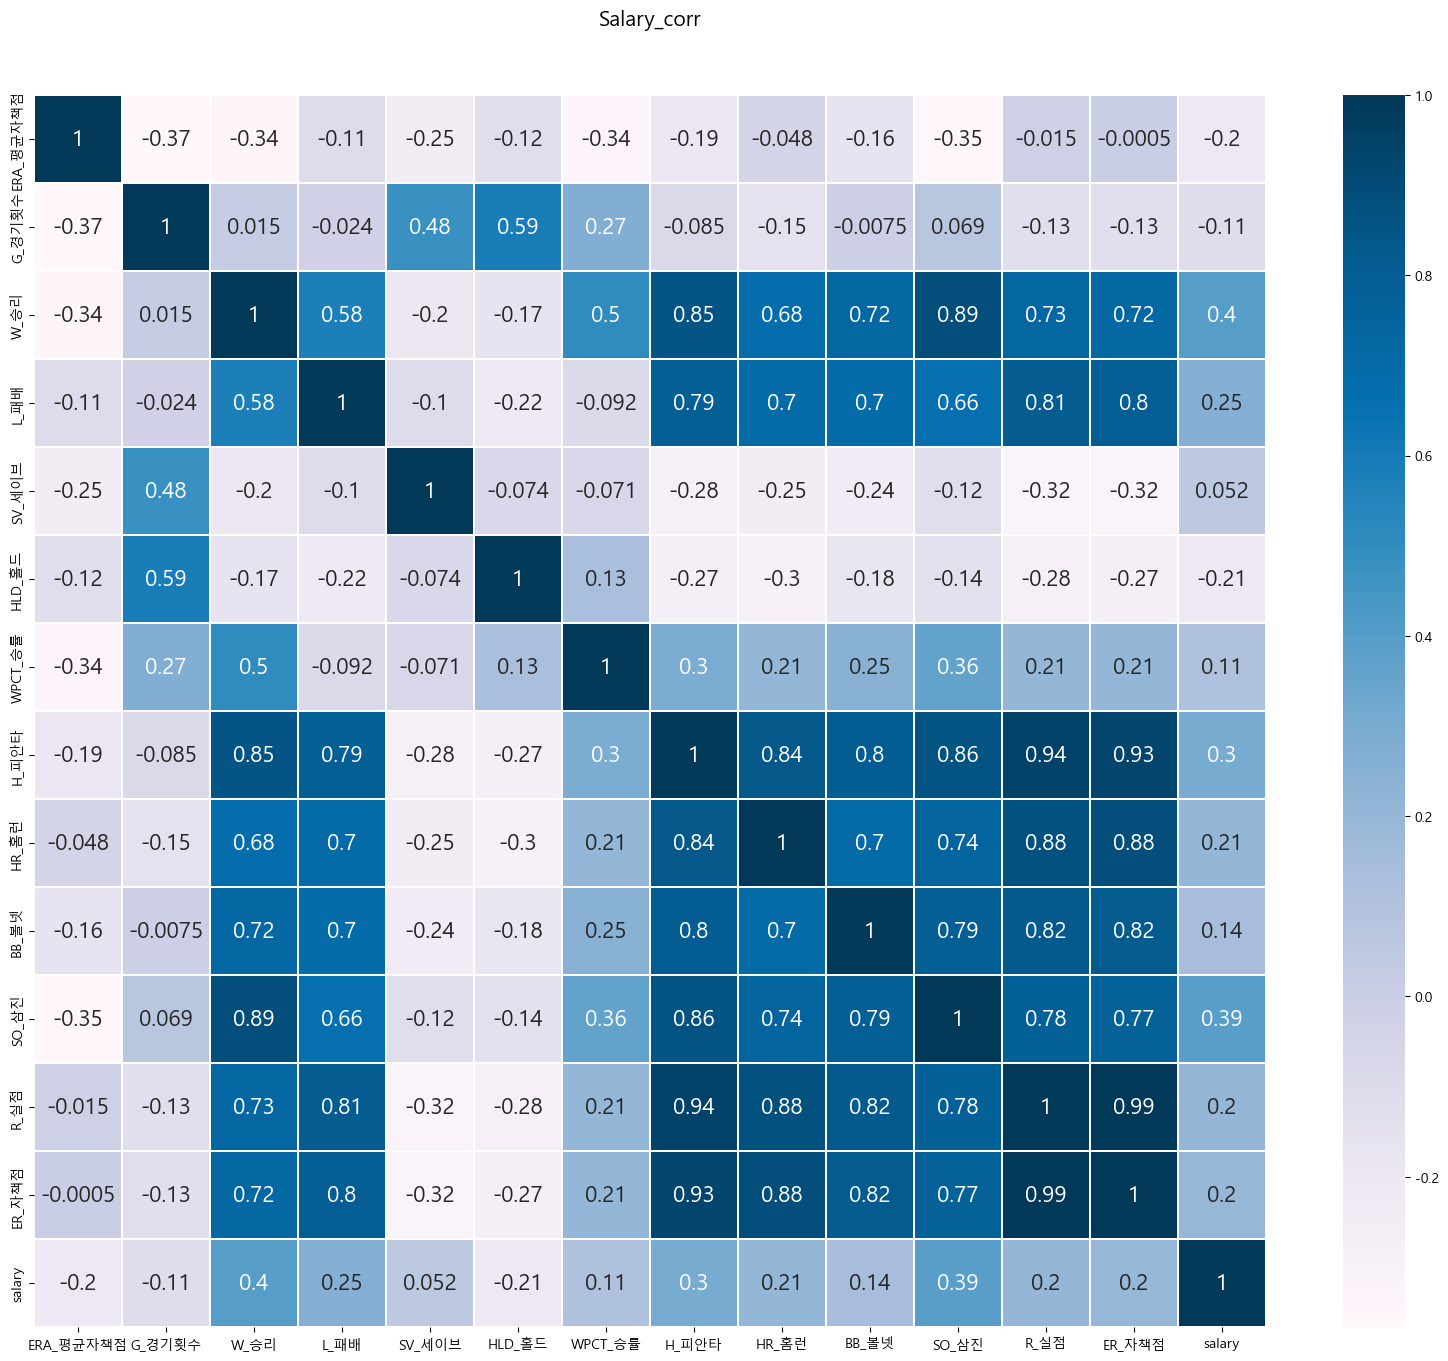

In [102]:
colormap = plt.cm.PuBu
plt.figure(figsize=(20, 16))
plt.title("Salary_corr", y = 1.05, size = 15)
sns.heatmap(player_salary_df_corr.astype(float).corr(), linewidths = 0.1, vmax = 1.0,
           square = True, cmap = colormap, linecolor = "white", annot = True, annot_kws = {"size" : 16});

- 연봉과 상관계수를 봤을 때 승리, 피안타, 삼진 등 변수가 상대적으로 높은 계수를 보임

In [103]:
df_dong_ml = df_dong[["ERA_평균자책점","G_경기횟수","W_승리","L_패배","SV_세이브","HLD_홀드","WPCT_승률","H_피안타","HR_홈런", 
        "BB_볼넷", "SO_삼진", "R_실점", "ER_자책점"]]
df_dong_ml

,ERA_평균자책점,G_경기횟수,W_승리,L_패배,SV_세이브,HLD_홀드,WPCT_승률,H_피안타,HR_홈런,BB_볼넷,SO_삼진,R_실점,ER_자책점
0,2.89,38,9,16,4,0,0.360,202,17,51,148,89,67
1,2.40,51,27,13,6,0,0.675,228,18,68,223,91,76
2,1.92,42,20,9,8,0,0.690,170,7,41,161,60,48
3,1.55,39,19,14,2,0,0.576,204,7,55,208,60,46
4,2.81,32,14,12,2,0,0.538,218,6,61,163,80,70
5,2.05,16,7,3,3,0,0.700,77,4,24,83,24,19


In [104]:
import numpy as np

import scipy as sp
import scipy.stats as stats

import statsmodels.api as sm
from statsmodels.formula.api import ols

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

ss_scaler = StandardScaler()

In [105]:
x = player_salary_df_corr.iloc[:,:-1]
y = player_salary_df_corr[["salary"]]

In [106]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=13)

In [107]:
x.shape, y.shape

((153, 13), (153, 1))

- 가장 먼저 선형회귀 모델을 구축하기 위해 최소제곱을 사용
- 최소제곱법을 사용하기 위해 x_train 데이터 $\beta$값을 줌

In [108]:
x_train = sm.add_constant(x_train)
model = sm.OLS(y_train, x_train, axis=1)
model_trained = model.fit()

C:\Users\xswer\miniconda3\envs\ds_study\lib\site-packages\statsmodels\base\model.py:127: ValueWarning: unknown kwargs ['axis']
  warnings.warn(msg, ValueWarning)


In [109]:
print(model_trained.summary())

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.346
Model:                            OLS   Adj. R-squared:                  0.267
Method:                 Least Squares   F-statistic:                     4.395
Date:                Sat, 25 Mar 2023   Prob (F-statistic):           6.32e-06
Time:                        00:33:42   Log-Likelihood:                -1444.3
No. Observations:                 122   AIC:                             2917.
Df Residuals:                     108   BIC:                             2956.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.238e+04   2.01e+04      3.608      0.0

- P-value값이 높은 컬럼을 제외하고, [ERA_평균자책점, G_경기횟수, W_승리, SV_세이브, BB_볼넷, SO_삼진] 컬럼만 회귀분석에 모델링 시작

In [110]:
model = sm.OLS(y_train, x_train.drop(["L_패배", "HLD_홀드", "WPCT_승률", "H_피안타", "HR_홈런", "R_실점", "ER_자책점"], axis=1))
model_trained = model.fit()
print(model_trained.summary())

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.313
Model:                            OLS   Adj. R-squared:                  0.277
Method:                 Least Squares   F-statistic:                     8.727
Date:                Sat, 25 Mar 2023   Prob (F-statistic):           7.83e-08
Time:                        00:33:44   Log-Likelihood:                -1447.3
No. Observations:                 122   AIC:                             2909.
Df Residuals:                     115   BIC:                             2928.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.385e+04   1.62e+04      4.559      0.0

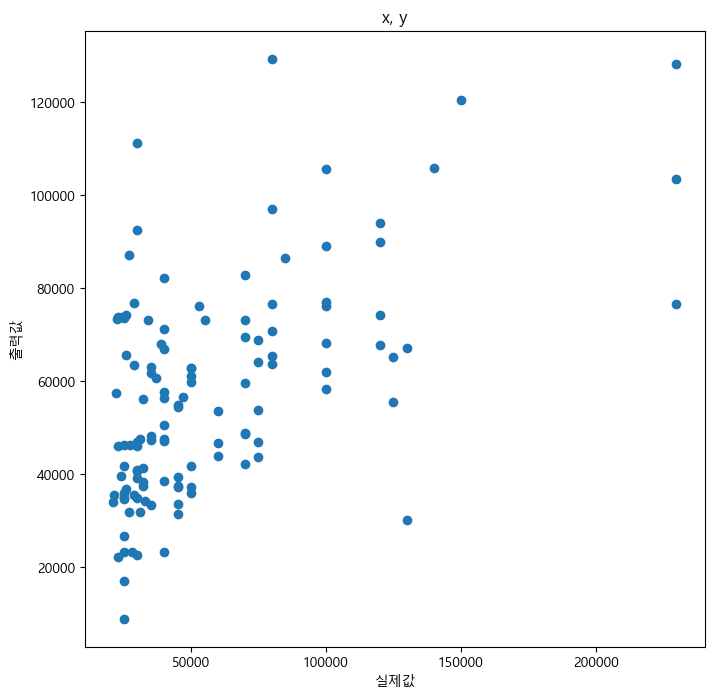

In [111]:
y_train_pred = model_trained.fittedvalues

plt.figure(figsize=(8, 8))
plt.title("x, y")
plt.scatter(y_train, y_train_pred)
plt.xlabel("실제값")
plt.ylabel("출력값")
plt.show()

- 실제값과 모델의 예측값을 시각화 결과, 좋은 성능을 보이지는 않지만 자료 특성상 연봉이 낮은 분포가 많기에 값이 낮은 구간에 몰려있음

In [112]:
x_test = sm.add_constant(x_test)

In [113]:
y_test_pred = model_trained.predict(x_test.drop(["L_패배", "HLD_홀드", "WPCT_승률", "H_피안타", "HR_홈런", "R_실점", "ER_자책점"], axis=1))
y_test_pred.head()

138     49245.465664
133     54747.915761
78      33119.865852
144     61962.868308
103    131625.973477
dtype: float64

- 평균제곱오차 $\frac{1}{n}\sum_{i=1}^{n} t_i(y-\tilde{y})^2$

In [114]:
print(mean_squared_error(y_test, y_test_pred))

774427004.5857927


- 제곱근 평균 제곱 오차 $\sqrt{\frac{1}{n}\sum_{i=1}^{n} t_i(y-\tilde{y})^2}$
> RMSE는 MSE가 너무 너무 큰값을 가지기 때문에 MSE값에 루트를 사용해서 출력

In [115]:
print(np.sqrt(mean_squared_error(y_test, y_test_pred)))

27828.52860978806


In [116]:
x_test.head()

,const,ERA_평균자책점,G_경기횟수,W_승리,L_패배,SV_세이브,HLD_홀드,WPCT_승률,H_피안타,HR_홈런,BB_볼넷,SO_삼진,R_실점,ER_자책점
138,1.0,5.79,5.0,0.0,2.0,0.0,0.0,0.000,19.0,0.0,11.0,4.0,14.0,12.0
133,1.0,8.44,5.0,1.0,3.0,0.0,0.0,0.250,41.0,7.0,6.0,15.0,25.0,25.0
78,1.0,4.99,39.0,1.0,0.0,0.0,6.0,1.000,39.0,4.0,14.0,21.0,18.0,17.0
144,1.0,4.10,40.0,0.0,4.0,17.0,1.0,0.000,37.0,2.0,19.0,51.0,22.0,19.0
103,1.0,2.51,31.0,17.0,6.0,0.0,0.0,0.739,198.0,13.0,38.0,180.0,64.0,53.0


In [117]:
df_dong_ml

,ERA_평균자책점,G_경기횟수,W_승리,L_패배,SV_세이브,HLD_홀드,WPCT_승률,H_피안타,HR_홈런,BB_볼넷,SO_삼진,R_실점,ER_자책점
0,2.89,38,9,16,4,0,0.360,202,17,51,148,89,67
1,2.40,51,27,13,6,0,0.675,228,18,68,223,91,76
2,1.92,42,20,9,8,0,0.690,170,7,41,161,60,48
3,1.55,39,19,14,2,0,0.576,204,7,55,208,60,46
4,2.81,32,14,12,2,0,0.538,218,6,61,163,80,70
5,2.05,16,7,3,3,0,0.700,77,4,24,83,24,19


In [118]:
df_dong_ml.drop(["L_패배", "HLD_홀드", "WPCT_승률", "H_피안타", "HR_홈런", "R_실점", "ER_자책점"], axis=1)

,ERA_평균자책점,G_경기횟수,W_승리,SV_세이브,BB_볼넷,SO_삼진
0,2.89,38,9,4,51,148
1,2.40,51,27,6,68,223
2,1.92,42,20,8,41,161
3,1.55,39,19,2,55,208
4,2.81,32,14,2,61,163
5,2.05,16,7,3,24,83


In [122]:
df_dong_ml = df_dong_ml.astype("float")

In [123]:
df_dong_ml = sm.add_constant(df_dong_ml)

In [124]:
model_trained.predict(df_dong_ml.drop(["L_패배", "HLD_홀드", "WPCT_승률", "H_피안타", "HR_홈런", "R_실점", "ER_자책점"], axis=1))

0     86644.000738
1    140427.423226
2    130268.198925
3    132706.312759
4     98299.986321
5     93337.717360
dtype: float64

# OLS 분석결과
- 최동원 선수의 연봉이 8억 ~ 14억 정도의 값이 나왔는데, 당시 업계 TOP 선수의 연봉의 금액이 설들력이 부족하기 때문에 Scaler를 바꾸고 다른 분석 기법을 사용

In [137]:
x = player_salary_df_corr.drop(["L_패배", "HLD_홀드", "WPCT_승률", "H_피안타", "HR_홈런", "R_실점", "ER_자책점", "salary"], axis=1)
y = player_salary_df_corr[["salary"]]

In [141]:
lf_Re = LinearRegression()

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=13)

In [142]:
ss_scaler = StandardScaler()


ss_scaler.fit(x_train)
x_train_scaled = ss_scaler.transform(x_train)
x_test_scaled = ss_scaler.transform(x_test)

In [143]:
lf_Re.fit(x_train_scaled, y_train)

LinearRegression()

In [144]:
x_train_scaled.shape

(122, 6)

In [145]:
pred_train = lf_Re.predict(x_train_scaled)
pred_test = lf_Re.predict(x_test_scaled)

In [146]:
rmse_train = (np.sqrt(mean_squared_error(y_train, pred_train)))
rmse_test = (np.sqrt(mean_squared_error(y_test, pred_test)))

In [147]:
print("RMSE_train : %0.2f"%rmse_train)

RMSE_train : 34344.43


In [148]:
print("RMSE_test : %0.2f"%rmse_test)

RMSE_test : 27828.53


In [155]:
dong_ss = ss_scaler.transform(df_dong_ml.drop(["L_패배", "HLD_홀드", "WPCT_승률", "H_피안타", "HR_홈런", "R_실점", "ER_자책점"], axis=1))

In [156]:
lf_Re.predict(dong_ss)

array([[ 86644.00073796],
       [140427.42322614],
       [130268.19892478],
       [132706.31275939],
       [ 98299.98632146],
       [ 93337.71735999]])

In [157]:
df_dong_ml.drop(["L_패배", "HLD_홀드", "WPCT_승률", "H_피안타", "HR_홈런", "R_실점", "ER_자책점"], axis=1)

,ERA_평균자책점,G_경기횟수,W_승리,SV_세이브,BB_볼넷,SO_삼진
0,2.89,38,9,4,51,148
1,2.40,51,27,6,68,223
2,1.92,42,20,8,41,161
3,1.55,39,19,2,55,208
4,2.81,32,14,2,61,163
5,2.05,16,7,3,24,83


In [158]:
lf_Re = LinearRegression()

x = player_salary_df_corr.drop(["L_패배", "HLD_홀드", "WPCT_승률", "H_피안타", "HR_홈런", "R_실점", "ER_자책점", "salary"], axis=1)
y = player_salary_df_corr[["salary"]]


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=13)

In [159]:
lf_Re.fit(x_train, y_train)

LinearRegression()

In [160]:
pred_train= lf_Re.predict(x_train)
pred_test= lf_Re.predict(x_test)

In [161]:
rmse_train = (np.sqrt(mean_squared_error(y_train, pred_train)))
rmse_test = (np.sqrt(mean_squared_error(y_test, pred_test)))

In [164]:
print("RMSE_train : %0.2f"%rmse_train)

RMSE_train : 34344.43


In [165]:
print("RMSE_test : %0.2f"%rmse_test)

RMSE_test : 27828.53


In [166]:
lf_Re.predict(df_dong_ml.drop(["L_패배", "HLD_홀드", "WPCT_승률", "H_피안타", "HR_홈런", "R_실점", "ER_자책점"], axis=1))

array([[ 86644.00073795],
       [140427.42322614],
       [130268.19892478],
       [132706.31275939],
       [ 98299.98632146],
       [ 93337.71735999]])

# 선형회귀 결과

- 먼저 기본 및 StandarScaler로 바꾸고, 분석 결과 최동원 선수의 연봉은 1983 ~ 1988년까지  8~13억의 연봉을 받았을 거라 예측
- 예측 근거, 투수로서 지표를 나타내는
> ERA_평균자책점	G_경기횟수	W_승리	SV_세이브	BB_볼넷	SO_삼진 6개의 컬럼을 기준으로 측정
> 6개 컬럼 선정 기준 OLS기법 분석 결과 p-value값이 낮은 6개의 컬럼 결정
- 현대 선수 153명의 데이터를 회귀분석으로 모델링한 결과 성능은 라벨링 '억'단위 기준 2~3정도의 오차를 가지며, 해당 모델을 통해 최동원 선수의 6년치 데이터를 예측한 결과 8억 6천 / 14억 4천 / 13억 / 13억 1천 / 9억 8천 / 9억 3천 정도의 연봉을 예측함

- 다른 방향에서 분석을 하기 위해 현재 6년치 데이터의 라벨인 연봉을 7개의 등급으로 범주화시키고 최동원 선수는 어느 위치인지 분석 실시

- StandardScaler로 바꿔도 결과값이 크게 바뀌지 않았으며, 최고 연봉이 14억이 예측됨

In [324]:
df_dong_ml

,ERA_평균자책점,G_경기횟수,W_승리,L_패배,SV_세이브,HLD_홀드,WPCT_승률,H_피안타,HR_홈런,BB_볼넷,SO_삼진,R_실점,ER_자책점
0,2.89,38,9,16,4,0,0.360,202,17,51,148,89,67
1,2.40,51,27,13,6,0,0.675,228,18,68,223,91,76
2,1.92,42,20,9,8,0,0.690,170,7,41,161,60,48
3,1.55,39,19,14,2,0,0.576,204,7,55,208,60,46
4,2.81,32,14,12,2,0,0.538,218,6,61,163,80,70
5,2.05,16,7,3,3,0,0.700,77,4,24,83,24,19


In [325]:
player_salary_df_corr

,ERA_평균자책점,G_경기횟수,W_승리,L_패배,SV_세이브,HLD_홀드,WPCT_승률,H_피안타,HR_홈런,BB_볼넷,SO_삼진,R_실점,ER_자책점,salary
0,3.82,58.0,4.0,6.0,23.0,0.0,0.400,73.0,6.0,13.0,63.0,35.0,26.0,5.30
1,4.82,45.0,11.0,4.0,0.0,10.0,0.733,126.0,14.0,41.0,122.0,70.0,66.0,2.30
2,4.08,30.0,12.0,12.0,0.0,0.0,0.500,182.0,13.0,68.0,128.0,86.0,77.0,10.00
3,4.47,47.0,1.0,4.0,4.0,0.0,0.200,57.0,6.0,37.0,41.0,33.0,29.0,2.30
4,2.95,19.0,2.0,1.0,3.0,3.0,0.667,16.0,3.0,7.0,17.0,6.0,6.0,5.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,4.26,58.0,3.0,5.0,30.0,0.0,0.375,56.0,4.0,20.0,41.0,30.0,27.0,2.60
149,6.55,19.0,5.0,6.0,0.0,0.0,0.455,105.0,14.0,43.0,61.0,66.0,66.0,2.75
150,3.65,25.0,6.0,8.0,0.0,0.0,0.429,136.0,13.0,45.0,117.0,64.0,59.0,2.57
151,4.81,29.0,13.0,11.0,0.0,0.0,0.542,146.0,14.0,78.0,134.0,90.0,84.0,2.90


In [329]:
min_salary = min(player_salary_df_corr["salary"])
max_salary = max(player_salary_df_corr["salary"])
min_salary, max_salary

(2.1, 23.0)

In [337]:
salary_grade = np.linspace(min_salary, max_salary, 11)

In [342]:
salary_list = []

for grade in player_salary_df_corr["salary"]:
    if grade < salary_grade[1]:
        salary_list.append(1)
    elif grade >= salary_grade[1] and grade < salary_grade[2]:
        salary_list.append(2)
    elif grade >= salary_grade[2] and grade < salary_grade[3]:
        salary_list.append(3)
    elif grade >= salary_grade[3] and grade < salary_grade[4]:
        salary_list.append(4)
    elif grade >= salary_grade[4] and grade < salary_grade[5]:
        salary_list.append(5)
    elif grade >= salary_grade[5] and grade < salary_grade[6]:
        salary_list.append(6)
    elif grade >= salary_grade[6] and grade < salary_grade[7]:
        salary_list.append(7)
    elif grade >= salary_grade[7] and grade < salary_grade[8]:
        salary_list.append(8)
    elif grade >= salary_grade[8] and grade < salary_grade[9]:
        salary_list.append(9)
    else:
        salary_list.append(10)
salary_list

[2,
 1,
 4,
 1,
 2,
 1,
 1,
 1,
 2,
 3,
 3,
 1,
 3,
 2,
 1,
 2,
 1,
 1,
 1,
 2,
 1,
 2,
 1,
 4,
 1,
 1,
 3,
 1,
 1,
 2,
 1,
 3,
 1,
 3,
 3,
 5,
 2,
 1,
 1,
 2,
 1,
 5,
 3,
 1,
 1,
 1,
 2,
 1,
 4,
 1,
 1,
 1,
 4,
 1,
 2,
 3,
 1,
 1,
 2,
 3,
 3,
 3,
 5,
 1,
 1,
 2,
 2,
 2,
 7,
 2,
 1,
 1,
 4,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 4,
 3,
 2,
 1,
 1,
 3,
 3,
 2,
 5,
 2,
 1,
 1,
 2,
 10,
 2,
 1,
 1,
 5,
 4,
 2,
 1,
 6,
 1,
 7,
 1,
 1,
 1,
 1,
 1,
 2,
 6,
 3,
 1,
 3,
 1,
 3,
 1,
 10,
 4,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 2,
 1,
 5,
 1,
 1,
 1,
 3,
 3,
 1,
 10,
 6,
 1,
 1,
 1,
 4,
 1,
 1,
 1,
 1,
 1]

In [343]:
player_salary_df_corr["salary"] = salary_list
player_salary_df_corr

C:\Users\xswer\AppData\Local\Temp\ipykernel_14852\211935533.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  player_salary_df_corr["salary"] = salary_list


,ERA_평균자책점,G_경기횟수,W_승리,L_패배,SV_세이브,HLD_홀드,WPCT_승률,H_피안타,HR_홈런,BB_볼넷,SO_삼진,R_실점,ER_자책점,salary
0,3.82,58.0,4.0,6.0,23.0,0.0,0.400,73.0,6.0,13.0,63.0,35.0,26.0,2
1,4.82,45.0,11.0,4.0,0.0,10.0,0.733,126.0,14.0,41.0,122.0,70.0,66.0,1
2,4.08,30.0,12.0,12.0,0.0,0.0,0.500,182.0,13.0,68.0,128.0,86.0,77.0,4
3,4.47,47.0,1.0,4.0,4.0,0.0,0.200,57.0,6.0,37.0,41.0,33.0,29.0,1
4,2.95,19.0,2.0,1.0,3.0,3.0,0.667,16.0,3.0,7.0,17.0,6.0,6.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,4.26,58.0,3.0,5.0,30.0,0.0,0.375,56.0,4.0,20.0,41.0,30.0,27.0,1
149,6.55,19.0,5.0,6.0,0.0,0.0,0.455,105.0,14.0,43.0,61.0,66.0,66.0,1
150,3.65,25.0,6.0,8.0,0.0,0.0,0.429,136.0,13.0,45.0,117.0,64.0,59.0,1
151,4.81,29.0,13.0,11.0,0.0,0.0,0.542,146.0,14.0,78.0,134.0,90.0,84.0,1


In [345]:
player_salary_df_corr["salary"].value_counts()

1     82
2     28
3     20
4      9
5      6
10     3
6      3
7      2
Name: salary, dtype: int64

In [346]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

In [363]:
x = player_salary_df_corr.iloc[:, :-1]
y = player_salary_df_corr["salary"]

In [425]:
rf_clf = RandomForestClassifier()
x_train, x_text, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=13)

In [426]:
params = {
    "n_estimators" : [10, 50],
    "random_state" : [13]}
cv = StratifiedKFold(n_splits=5, shuffle=True)

In [427]:
gridCv = GridSearchCV(rf_clf, param_grid=params, scoring='accuracy')

In [428]:
x_train.shape, y_train.shape

((122, 13), (122,))

In [429]:
y_train.values.reshape(1,-1).shape

(1, 122)

In [430]:
gridCv.fit(x_train, y_train)

C:\Users\xswer\miniconda3\envs\ds_study\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [10, 50], 'random_state': [13]},
             scoring='accuracy')

In [431]:
gridCv.best_estimator_

RandomForestClassifier(n_estimators=50, random_state=13)

In [432]:
gridCv.best_score_

0.5236666666666666

In [438]:
rf_clf = RandomForestClassifier(n_estimators=50, random_state=13)

In [439]:
rf_clf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=50, random_state=13)

In [440]:
pred = rf_clf.predict(x_test)

C:\Users\xswer\miniconda3\envs\ds_study\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [442]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, pred)

0.5161290322580645

In [450]:
rf_clf.predict(df_dong_ml)

array([ 4,  7, 10, 10,  4,  2], dtype=int64)

# 랜덤포레스트 결과
- 아무래도 데이터 셋이 작은 상태에서, 연속형 자료를 범주형 자료로 변환 후 모델링 결과 성능도 매우 낮으며, 결과 또한 신빙성이 부족함
- 당시 업계 TOP인 선수의 연봉이 4~10등급이라는 결과는 설득력이 매우 부족.